In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data sets
df_cust = pd.read_csv('..\Data\Customer.csv')


In [3]:
df_cust.head(10)

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0
5,1,32500,24,47,female,Secondary special education,Furniture,0,2,26000,Married,0,1,0
6,1,8000,3,23,male,Higher education,Computers,0,2,21000,Another,0,1,0
7,1,20000,10,25,female,Higher education,Household appliances,0,0,33000,Married,2,1,0
8,1,26000,6,21,female,Secondary special education,Cell phones,0,0,31000,Another,2,1,0
9,1,15000,24,25,female,Secondary special education,Household appliances,1,2,26000,Another,3,0,0


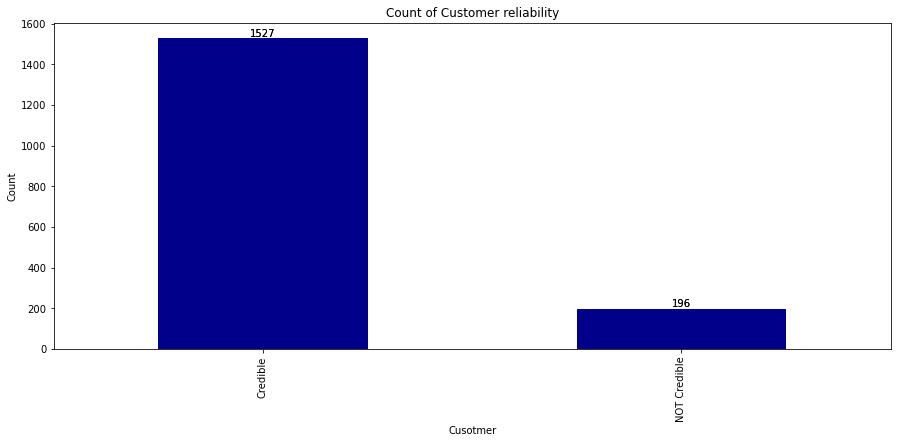

In [4]:
# Increase the figure size
plt.figure(figsize=(15, 6))
# Plot a column with the count
df_cust['bad_client_target'].value_counts().plot(kind='bar')

# Plot a column with the count
ax = df_cust['bad_client_target'].value_counts().plot(kind='bar', color='darkblue')

# Add count values to the plot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the x-label names
x_labels = ['Credible', 'NOT Credible']  # Replace with your desired label names
ax.set_xticklabels(x_labels)

# Set the labels and title
plt.xlabel('Cusotmer')
plt.ylabel('Count')
plt.title('Count of Customer reliability')

# Display the plot
plt.show()

## Lets understand each column separately, how does it affect the target

### Month of Purchase

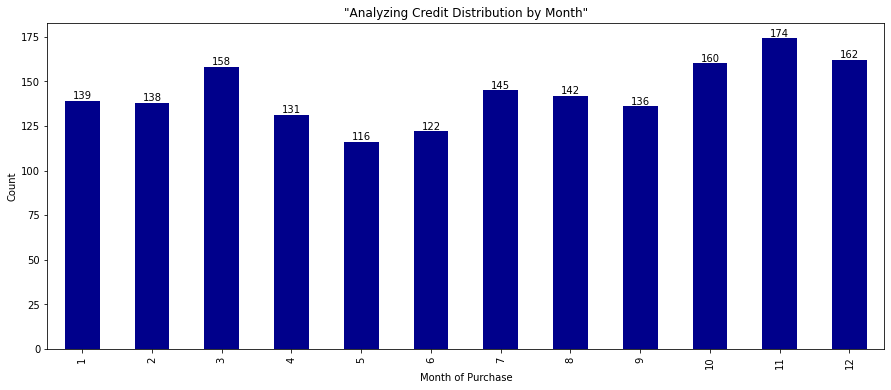

<Figure size 1080x432 with 0 Axes>

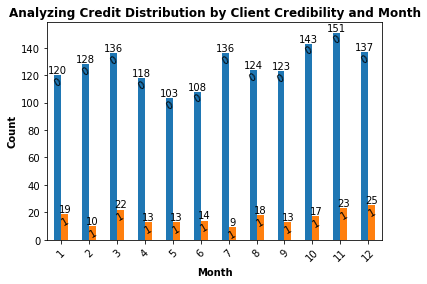

In [5]:
# Increase the figure size
plt.figure(figsize=(15, 6))
# Plot a column with the count
ax = df_cust['month'].value_counts().sort_index().plot(kind='bar', color='darkblue')

# Add count values to the plot
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# # Set the x-label names
# x_labels = ['Credible', 'NOT Credible']  # Replace with your desired label names
# ax.set_xticklabels(x_labels)

# Set the labels and title
plt.xlabel('Month of Purchase')
plt.ylabel('Count')
plt.title('"Analyzing Credit Distribution by Month"')

# Display the plot
plt.show()

##########################################
import matplotlib.pyplot as plt
# Increase the figure size
plt.figure(figsize=(15, 6))
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['month','bad_client_target']).size().reset_index(name='count')


# Create a bar plot
pivoted_data = result.pivot_table(index=['month'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)


# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Credit Distribution by Client Credibility and Month', fontweight='bold')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()




### Credit amount

In [6]:
#let us remove all the unwanted  the columns
df_cust_credit_amt = df_cust[['credit_amount','bad_client_target']]

#filter the rows to get some information on credit amount for the not credible customer
df_cust_credit_amt_0 = df_cust_credit_amt[df_cust_credit_amt['bad_client_target'] == 0]['credit_amount']
 
# print the stats
print("\nSummary of credit amount for the credible customer\n",df_cust_credit_amt_0.describe()) 


#filter the rows to get some information on credit amount for the credible customer
df_cust_credit_amt_1 = df_cust_credit_amt[df_cust_credit_amt['bad_client_target'] == 1]['credit_amount']

# print the stats
print("\nSummary of credit amount for the non credible customer\n",df_cust_credit_amt_1.describe())





Summary of credit amount for the credible customer
 count      1527.000000
mean      29405.042567
std       28446.383670
min        5000.000000
25%       13000.000000
50%       21500.000000
75%       34500.000000
max      301000.000000
Name: credit_amount, dtype: float64

Summary of credit amount for the non credible customer
 count       196.000000
mean      28170.918367
std       23522.768483
min        5000.000000
25%       14000.000000
50%       24250.000000
75%       34000.000000
max      201000.000000
Name: credit_amount, dtype: float64


### Credit Term

In [7]:
#let us remove all the unwanted  the columns
df_cust_credit_term = df_cust[['credit_term','bad_client_target']]

#filter the rows to get some information on credit term for the not credible customer
df_cust_credit_term_0 = df_cust_credit_term[df_cust_credit_term['bad_client_target'] == 0]['credit_term']
 
# print the stats
print("\nSummary of credit term for the  credible customer\n",df_cust_credit_term_0.describe()) 


#filter the rows to get some information on credit term for the credible customer
df_cust_credit_term_1 = df_cust_credit_term[df_cust_credit_term['bad_client_target'] == 1]['credit_term']

# print the stats
print("\nSummary of credit term for the non credible customer\n",df_cust_credit_term_1.describe())





Summary of credit term for the  credible customer
 count    1527.000000
mean       11.371971
std         6.621420
min         3.000000
25%         6.000000
50%        12.000000
75%        12.000000
max        36.000000
Name: credit_term, dtype: float64

Summary of credit term for the non credible customer
 count    196.000000
mean      12.908163
std        5.785192
min        3.000000
25%       10.000000
50%       12.000000
75%       15.250000
max       36.000000
Name: credit_term, dtype: float64


### Age

In [8]:
#let us remove all the unwanted  the columns
df_cust_age = df_cust[['age','bad_client_target']]

#filter the rows to get some information on credit amount for the not credible customer
df_cust_age_0 = df_cust_age[df_cust_age['bad_client_target'] == 0]['age']
 
# print the stats
print("\nSummary of customer age for the credible customer\n",df_cust_age_0.describe()) 


#filter the rows to get some information on credit amount for the credible customer
df_cust_age_1 = df_cust_age[df_cust_age['bad_client_target'] == 1]['age']

# print the stats
print("\nSummary of customer age for the non credible customer\n",df_cust_age_1.describe())





Summary of customer age for the credible customer
 count    1527.000000
mean       36.391618
std        13.363107
min        19.000000
25%        26.000000
50%        32.000000
75%        44.000000
max        90.000000
Name: age, dtype: float64

Summary of customer age for the non credible customer
 count    196.000000
mean      32.173469
std       10.335922
min       18.000000
25%       24.000000
50%       29.000000
75%       37.250000
max       64.000000
Name: age, dtype: float64


### Sex of Customer

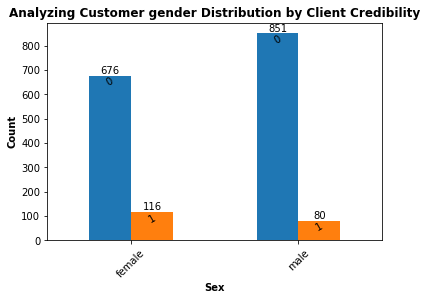

In [9]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['sex','bad_client_target']).size().reset_index(name='count')


# Create a bar plot
pivoted_data = result.pivot_table(index=['sex'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)
# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Customer gender Distribution by Client Credibility', fontweight='bold')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



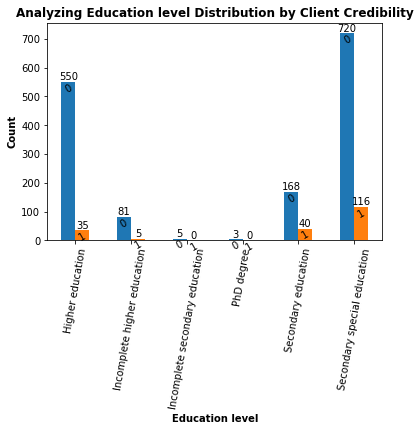

In [10]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['education','bad_client_target']).size().reset_index(name='count')

# print(result)
# Create a bar plot
pivoted_data = result.pivot_table(index=['education'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)
# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Education level', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Education level Distribution by Client Credibility', fontweight='bold')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=80)

# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### Product Type

                     product_type  bad_client_target  count
21           Household appliances                  0    435
5                     Cell phones                  0    385
10                      Computers                  0    170
18                      Furniture                  0    156
6                     Cell phones                  1    113
8                        Clothing                  0     84
14  Cosmetics and beauty services                  0     50
34                Windows & Doors                  0     45
22           Household appliances                  1     36
31                        Tourism                  0     35
23                        Jewelry                  0     28
25               Medical services                  0     26
12         Construction Materials                  0     26
17                        Fitness                  0     25
1                            Auto                  0     18
33                       Training       

<Figure size 1080x432 with 0 Axes>

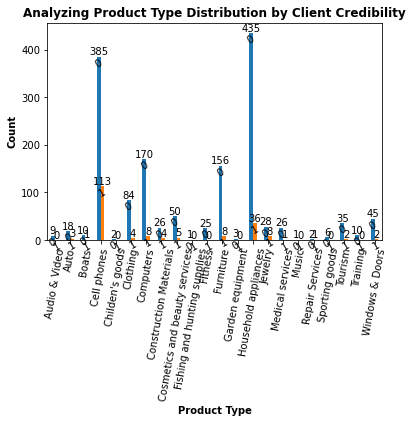

In [11]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['product_type','bad_client_target']).size().reset_index(name='count')

print(result.sort_values('count',ascending=False))
# Create a bar plot
pivoted_data = result.pivot_table(index=['product_type'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Product Type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Product Type Distribution by Client Credibility', fontweight='bold')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=80)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### having_children_flg

<Figure size 1080x432 with 0 Axes>

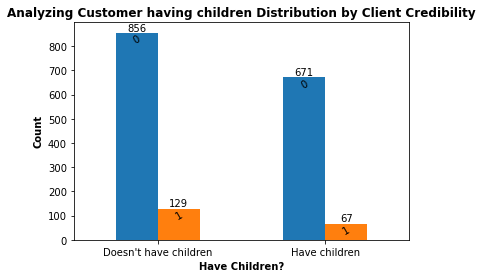

In [12]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['having_children_flg','bad_client_target']).size().reset_index(name='count')

# print(result.sort_values('count',ascending=False))
# Create a bar plot
pivoted_data = result.pivot_table(index=['having_children_flg'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Have Children?', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Customer having children Distribution by Client Credibility', fontweight='bold')


# Set the x-label names
x_labels = ["Doesn't have children", 'Have children']  # Replace with your desired label names
ax.set_xticklabels(x_labels)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=0)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### Region

   region  bad_client_target  count
0       0                  0    219
1       0                  1     21
2       1                  0     65
3       1                  1      4
4       2                  0   1243
5       2                  1    171


<Figure size 1080x432 with 0 Axes>

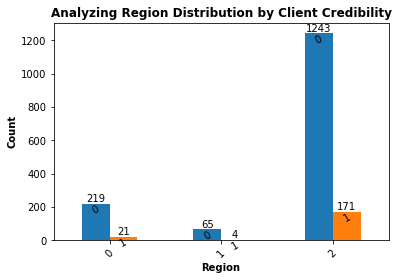

In [13]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['region','bad_client_target']).size().reset_index(name='count')

print(result)
# Create a bar plot
pivoted_data = result.pivot_table(index=['region'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Region Distribution by Client Credibility', fontweight='bold')


# Set the x-label names
# x_labels = ["Doesn't have children", 'Have children']  # Replace with your desired label names
# ax.set_xticklabels(x_labels)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### Income

In [14]:
#let us remove all the unwanted  the columns
df_cust_age = df_cust[['income','bad_client_target']]

#filter the rows to get some information on credit amount for the not credible customer
df_cust_age_0 = df_cust_age[df_cust_age['bad_client_target'] == 0]['income']
 
# print the stats
print("\nSummary of customer income for the credible customer\n",df_cust_age_0.describe()) 


#filter the rows to get some information on credit amount for the credible customer
df_cust_age_1 = df_cust_age[df_cust_age['bad_client_target'] == 1]['income']

# print the stats
print("\nSummary of customer income for the non credible customer\n",df_cust_age_1.describe())





Summary of customer income for the credible customer
 count      1527.000000
mean      33074.001310
std       21621.379126
min        1000.000000
25%       21000.000000
50%       28000.000000
75%       40000.000000
max      401000.000000
Name: income, dtype: float64

Summary of customer income for the non credible customer
 count       196.000000
mean      29367.346939
std       13843.363868
min       10000.000000
25%       21000.000000
50%       26000.000000
75%       35250.000000
max      131000.000000
Name: income, dtype: float64


### Family Status

<Figure size 1080x432 with 0 Axes>

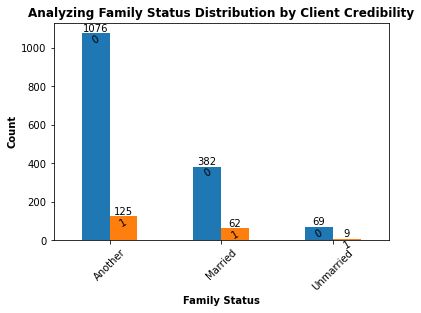

In [15]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['family_status','bad_client_target']).size().reset_index(name='count')

# print(result)
# Create a bar plot
pivoted_data = result.pivot_table(index=['family_status'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Family Status', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Family Status Distribution by Client Credibility', fontweight='bold')


# Set the x-label names
# x_labels = ["Doesn't have children", 'Have children']  # Replace with your desired label names
# ax.set_xticklabels(x_labels)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### Phone Operator

<Figure size 1080x432 with 0 Axes>

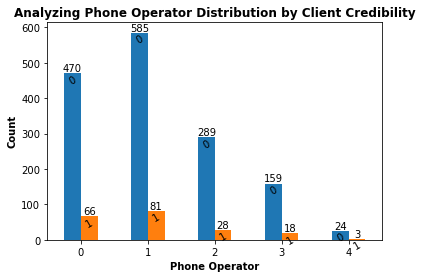

In [16]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['phone_operator','bad_client_target']).size().reset_index(name='count')

# print(result)
# Create a bar plot
pivoted_data = result.pivot_table(index=['phone_operator'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Phone Operator', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Phone Operator Distribution by Client Credibility', fontweight='bold')


# Set the x-label names
# x_labels = ["Doesn't have children", 'Have children']  # Replace with your desired label names
# ax.set_xticklabels(x_labels)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=0)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()



### Is Client

<Figure size 1080x504 with 0 Axes>

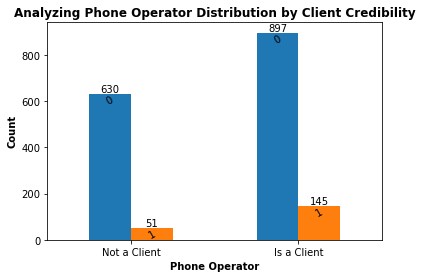

In [31]:
# Group by 'target_variable' and count occurrences
result = df_cust.groupby(['is_client','bad_client_target']).size().reset_index(name='count')

# print(result)
# Create a bar plot
pivoted_data = result.pivot_table(index=['is_client'],columns = 'bad_client_target' , values=['count'], aggfunc='sum')
# print(pivoted_data)

# Increase the figure size
plt.figure(figsize=(15, 7))

# Create a bar plot
ax = pivoted_data.plot(kind='bar', stacked=False)


# Add labels and a title
plt.xlabel('Phone Operator', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Analyzing Phone Operator Distribution by Client Credibility', fontweight='bold')


# Set the x-label names
x_labels = ["Not a Client", 'Is a Client']  # Replace with your desired label names
ax.set_xticklabels(x_labels)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=0)



# # Set custom y-axis limits
# plt.ylim(0, 10)


for i, p in enumerate(ax.patches):
    category = pivoted_data.columns[0 if i<len(ax.patches)/2 else 1][ 1 ]
    ax.annotate(f'{category}', (p.get_x() + p.get_width() / 2., p.get_height()-0.6), ha='center', va='top',rotation=30)
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Remove the legend
ax.get_legend().remove()

plt.show()

